<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Grouping-and-Aggregating-Data" data-toc-modified-id="Grouping-and-Aggregating-Data-1">Grouping and Aggregating Data</a></span><ul class="toc-item"><li><span><a href="#Split,-Apply,-Combine" data-toc-modified-id="Split,-Apply,-Combine-1.1">Split, Apply, Combine</a></span></li><li><span><a href="#Challenge:-Experimenting-with-Grouping-on-titanic" data-toc-modified-id="Challenge:-Experimenting-with-Grouping-on-titanic-1.2"><strong>Challenge</strong>: Experimenting with Grouping on <code>titanic</code></a></span></li></ul></li></ul></div>

# Grouping and Aggregating Data


The usual preamble for importing the essential modules and configuring the plotting engine.

In [6]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
sns.set(style="ticks", color_codes=True)
sns.set_context("notebook")

In [7]:
sns.set({ "figure.figsize": (12/1.5,8/1.5) })

We will make use of `gapminder` for illustration. As usual, note that the path to the data file should be changed to match the directory structure in your home area.

In [8]:
gm_df = pd.read_csv('gapminder2.tsv', sep='\t')

A quick reminder of structure and contents of the dataset:

In [9]:
gm_df.sample(5)

,country,continent,year,lifeExp,pop,gdpPercap
117,Belgium,Europe,1997,77.530,10199787,27561.196630
1398,Somalia,Africa,1982,42.955,5828892,1176.807031
5,Afghanistan,Asia,1977,38.438,14880372,786.113360
657,Honduras,Americas,1997,67.659,5867957,3160.454906
190,Bulgaria,Europe,2002,72.140,7661799,7696.777725


## Split, Apply, Combine

A quick example: let us obtain the mean averages of `lifeExp`, `pop`, and `gdpPercap` per country:

In [19]:
gm_df.groupby('country')[['lifeExp', 'pop','gdpPercap']].mean().head()

,lifeExp,pop,gdpPercap
country,,,
Afghanistan,37.478833,1.582372e+07,802.674598
Albania,68.432917,2.580249e+06,3255.366633
Algeria,59.030167,1.987541e+07,4426.025973
Angola,37.883500,7.309390e+06,3607.100529
Argentina,69.060417,2.860224e+07,8955.553783


Illustration from the textbook: https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html#Split,-apply,-combine.

How many observations for each continent?

In [20]:
gm_df.groupby('continent').size()

continent
Africa      624
Americas    300
Asia        396
Europe      360
Oceania      24
dtype: int64

In [22]:
gm_df['continent'].value_counts()

Africa      624
Asia        396
Europe      360
Americas    300
Oceania      24
Name: continent, dtype: int64

The highest life expectancy by continent and year?

In [25]:
gm_df.groupby(['continent', 'year'])[['lifeExp']].max()

lifeExp
continent year         
Africa    1952   52.724
          1957   58.089
          1962   60.246
          1967   61.557
          1972   64.274
          1977   67.064
          1982   69.885
          1987   71.913
          1992   73.615
          1997   74.772
          2002   75.744
          2007   76.442
Americas  1952   68.750
          1957   69.960
          1962   71.300
          1967   72.130
          1972   72.880
          1977   74.210
          1982   75.760
          1987   76.860
          1992   77.950
          1997   78.610
          2002   79.770
          2007   80.653
Asia      1952   65.390
          1957   67.840
          1962   69.390
          1967   71.430
          1972   73.420
          1977   75.380
          1982   77.110
          1987   78.670
          1992   79.360
          1997   80.690
          2002   82.000
          2007   82.603
Europe    1952   72.670
          1957   73.470
          1962   73.680
          1967   74.160
          1972   74.720
          1977   76.110
          1982   76.990
          1987   77.410
          1992   78.770
          1997   79.390
          2002   80.620
          2007   81.757
Oceania   1952   69.390
          1957   70.330
          1962   71.240
          1967   71.520
          1972   71.930
          1977   73.490
          1982   74.740
          1987   76.320
          1992   77.560
          1997   78.830
          2002   80.370
          2007   81.235

`.unstack()` is normally quite useful in combination with grouping. More details later: for now, it suffices to know that it makes a row index level into a column index (level):

In [26]:
gm_df.groupby(['continent', 'year'])['lifeExp'].mean().unstack('year')

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


A more complex expression (which could surely be broken down) shows how grouping and reshaping can give us some more interesting plots for groups comparisons and insights:

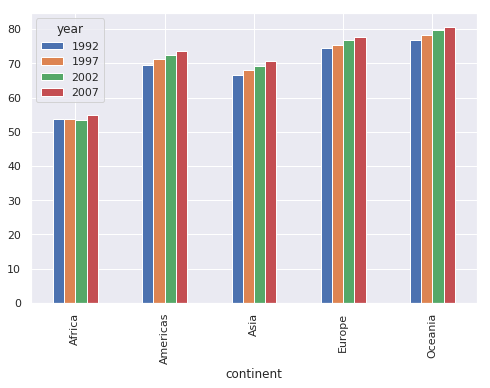

In [30]:
gm_df.groupby(['continent', 'year'])['lifeExp'].mean().unstack('year').loc[:, 1992:2007].plot.bar();

## **Challenge**: Experimenting with Grouping on `titanic`

Some of questions involving grouping that one might try to answer about the `titanic` dataset are:

In [31]:
titanic_df = pd.read_csv('train2.csv')

In [32]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What is total number of passangers by sex?

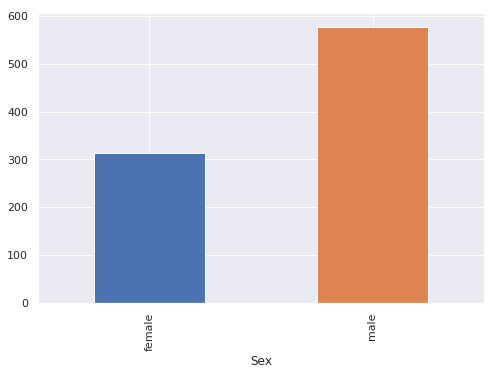

In [89]:
titanic_df.groupby(['Sex']).size().plot.bar()

What is the number of passangers by port of embarkment?

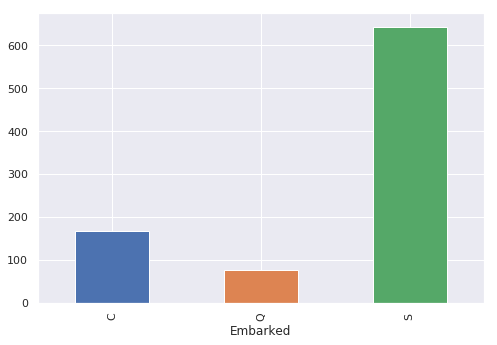

In [88]:
titanic_df.groupby(['Embarked']).size().plot.bar()

What is the mean age by sex?

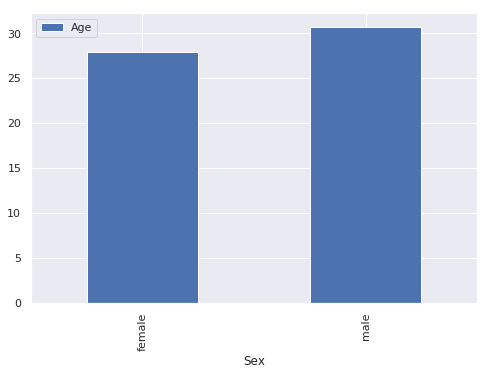

In [87]:
titanic_df.groupby(['Sex'])[['Age']].mean().plot.bar()

How many passengers travelled alone, by sex?

In [43]:
alone_df=titanic_df.loc[ (titanic_df['Parch']==0) & (titanic_df['SibSp']==0) ]
alone_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


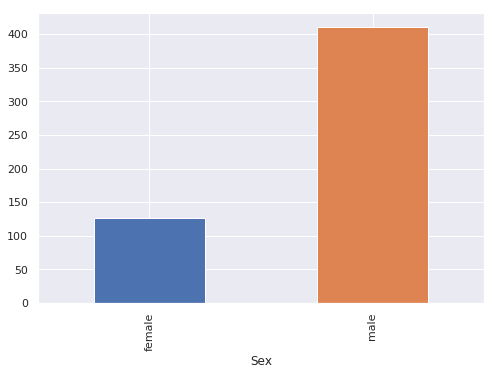

In [86]:
alone_df.groupby(['Sex']).size().plot.bar()

What is the mean fare value by class?

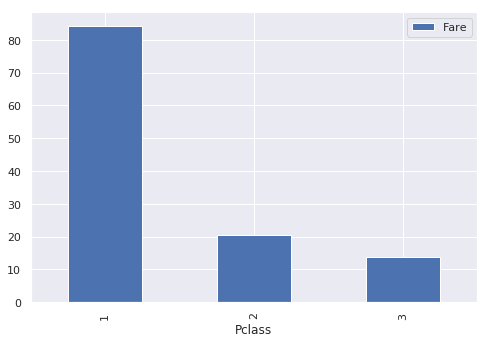

In [84]:
titanic_df.groupby(['Pclass'])[['Fare']].mean().plot.bar()

How many passengers survived and died, by class?

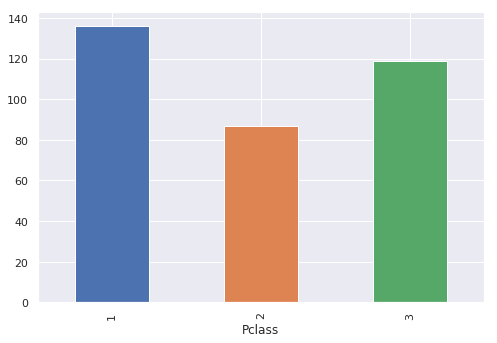

In [83]:
survived=titanic_df.loc[ titanic_df['Survived']==1 ]
survived.groupby(['Pclass'])[['Survived']].size().plot.bar()

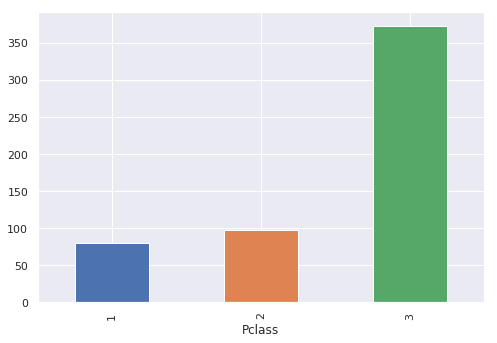

In [82]:
died=titanic_df.loc[ titanic_df['Survived']==0 ]
died.groupby(['Pclass'])[['Survived']].size().plot.bar()

How many passengers survived and died, by sex?

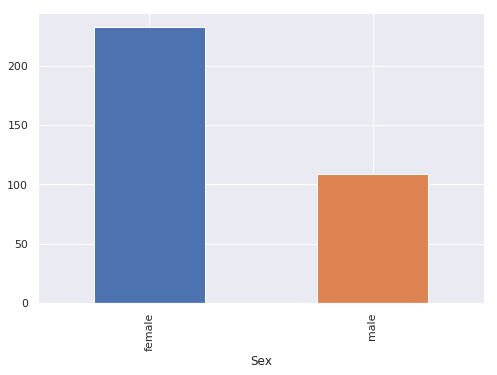

In [81]:
survived.groupby(['Sex'])[['Survived']].size().plot.bar()

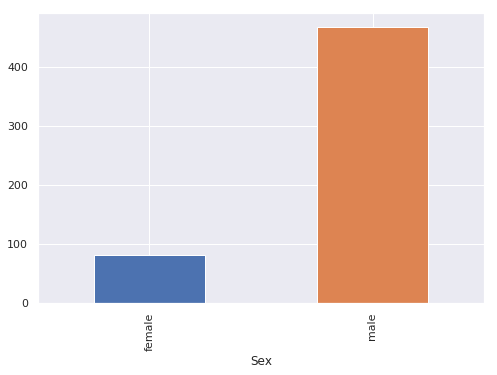

In [80]:
died.groupby(['Sex'])[['Survived']].size().plot.bar()

What are the highest values for `sibsp` (number of siblings/spouses) and `parch` (number of parents/children) by sex?

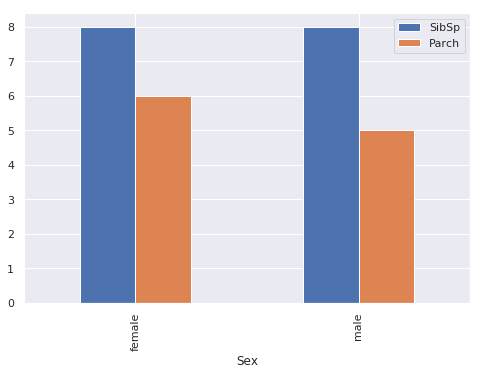

In [79]:
titanic_df.groupby(['Sex'])[['SibSp','Parch']].max().plot.bar()

Compare the average fear paid by men and women, broken down in the three different classes.

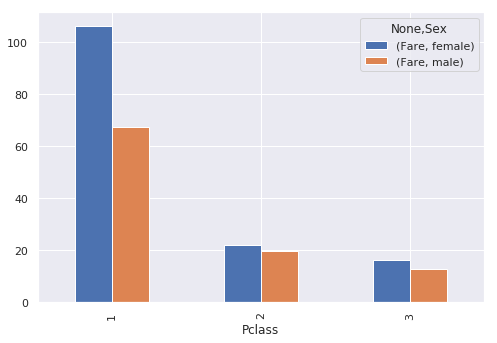

In [78]:
titanic_df.groupby(['Pclass','Sex'])[['Fare']].mean().unstack().plot.bar()